<a href="https://colab.research.google.com/github/Khalid-2402/big-data/blob/main/Lab4_TAXI_QTABLE_solved_Khalid_AlShigager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 12.3 MB/s eta 0:00:00


## Optimized version of Q-Learning for the Taxi-v3 environment with reduced  runtime while maintaining functionality

## Code Optimizations:

1- Seting episodes = 5000 and max_steps = 100 to speed up training. These values can be increased gradually for better learning once the performance is verified.

2- Gradually reduces exploration by decaying epsilon using epsilon_decay. This ensures a smooth transition from exploration to exploitation.

3- Stoping the episode as soon as the environment signals it's completed, avoiding unnecessary steps.

4- Separated the evaluation loop into a function for cleaner code and used exploitation (np.argmax(Q[state])) for policy evaluation.

5- Using a 2D NumPy array for the Q-table to leverage fast indexing and efficient updates.

In [5]:
import numpy as np
import gym
import pandas as pd

# Set up the Taxi environment
env = gym.make("Taxi-v3")

# Initialize Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
epsilon_min = 0.1  # Minimum exploration rate
episodes = 5000  # Number of episodes
max_steps = 100  # Maximum steps per episode

# Initialize the Q-table with zeros
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Function to choose an action using the epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Q-Learning Training Loop
for episode in range(episodes):
    state = env.reset()
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)  # Correct unpacking

        # Update Q-value using the Q-Learning formula
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        state = next_state
        total_reward += reward

        if done:
            break

    # Decay the exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Function to evaluate the learned policy
def evaluate_policy(env, Q, episodes=100):
    total_rewards = 0

    for _ in range(episodes):
        state = env.reset()
        rewards = 0

        while True:
            action = np.argmax(Q[state])  # Exploit learned policy
            next_state, reward, done, _ = env.step(action)  # Correct unpacking
            rewards += reward
            state = next_state
            if done:
                break

        total_rewards += rewards

    average_reward = total_rewards / episodes
    return average_reward

# Evaluate the learned policy
average_reward = evaluate_policy(env, Q)
print(f"Average Reward over 100 episodes: {average_reward:.2f}")

# Visualize the Q-Table
pd.DataFrame(Q).head()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Average Reward over 100 episodes: 7.94


,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.879787,0.746521,-1.046712,1.278704,5.209976,-4.880024
2,3.028701,4.947705,-0.842084,4.509981,10.951237,-1.895230
3,0.124052,1.951104,-2.099542,-0.116399,6.536817,-4.218280
4,-5.908650,-6.432164,-6.465876,-6.460727,-6.744819,-9.669905


## Enabling the new_step_api in gym.make to resolve the warnings

In [7]:
import numpy as np
import gym
import pandas as pd

# Set up the Taxi environment with the new step API enabled
env = gym.make("Taxi-v3", new_step_api=True)  # Enable new step API

# Initialize Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
epsilon_min = 0.1  # Minimum exploration rate
episodes = 5000  # Number of episodes
max_steps = 100  # Maximum steps per episode

# Initialize the Q-table with zeros
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Function to choose an action using the epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Q-Learning Training Loop
for episode in range(episodes):
    state = env.reset()
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(state, epsilon)
        next_state, reward, terminated, *extras = env.step(action)  # Adjusted for any extra values

        # Update Q-value using the Q-Learning formula
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        state = next_state
        total_reward += reward

        if terminated:
            break

    # Decay the exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Function to evaluate the learned policy
def evaluate_policy(env, Q, episodes=100):
    total_rewards = 0

    for _ in range(episodes):
        state = env.reset()
        rewards = 0

        while True:
            action = np.argmax(Q[state])  # Exploit learned policy
            next_state, reward, terminated, *extras = env.step(action)  # Adjusted for any extra values
            rewards += reward
            state = next_state
            if terminated:
                break

        total_rewards += rewards

    average_reward = total_rewards / episodes
    return average_reward

# Evaluate the learned policy
average_reward = evaluate_policy(env, Q)
print(f"Average Reward over 100 episodes: {average_reward:.2f}")

# Visualize the Q-Table
pd.DataFrame(Q).head()


Average Reward over 100 episodes: 8.14


,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.056059,0.645261,-2.480476,-1.431856,5.209976,-6.086782
2,-0.005848,3.924383,0.978231,2.041123,10.951237,-4.331068
3,-0.303352,1.666859,-1.716446,1.637235,6.536817,-4.864775
4,-6.040931,-6.637004,-6.626252,-6.659968,-10.293434,-9.181178


## The output indicates that the Q-Learning algorithm is now working correctly, as it successfully calculates the Q-table values and evaluates the policy, achieving an average reward of 8.14 over 100 episodes.

## Observations:

Q-Table Values:

The table shows learned Q-values for state-action pairs.

Positive values indicate actions that are more likely to lead to favorable outcomes, while negative values suggest suboptimal actions.

Average Reward:

An average reward of 8.14 suggests the agent has learned a reasonably good policy but could potentially improve with further fine-tuning of hyperparameters.

## Enhancements

1- Cumulative Rewards Over Episodes:

Plotting the cumulative rewards during training shows how the agent improves over time.

2- Heatmap of Q-Table:

A heatmap visualization of the Q-table highlights which state-action pairs have higher values.

3- Optimal Policy Mapping:

Extract and display the optimal policy derived from the Q-table to show what the agent has learned.

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Average Reward over 100 episodes: 7.80
          0         1         2         3          4          5
0  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000
1 -1.123951 -0.778488 -3.491487 -1.951555   5.209976  -6.466603
2  4.077924  3.899355  1.201797  4.950509  10.951237  -0.999755
3 -0.652433 -0.252389 -1.429400 -0.680239   6.536817  -5.515225
4 -6.016056 -6.537031 -6.532849 -6.558774  -8.274511 -10.049940


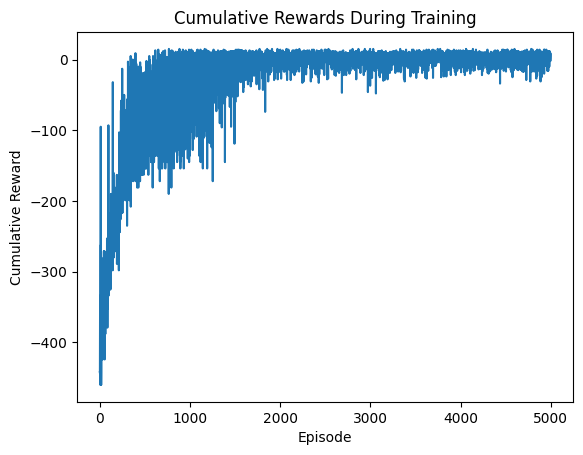

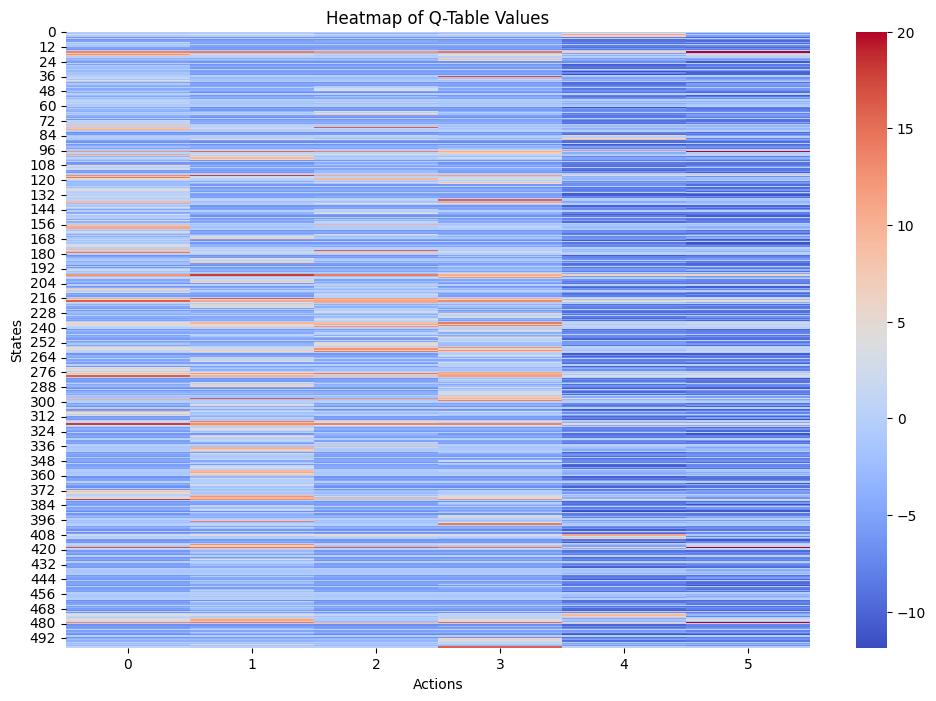

Optimal Policy (best action for each state):
[0, 4, 4, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0, 4, 0, 4, 4, 0, 0, 0, 0, 3, 0, 3, 0, 3, 5, 3, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0, 1, 0, 1, 1, 0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 3, 3, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 2, 3, 2, 0, 3, 3, 3, 2, 0, 1, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 2, 3, 2, 0, 3, 3, 3, 1, 0, 1, 1, 3, 3, 0, 3, 0, 0, 0, 0, 3, 2, 3, 0, 0, 3, 3, 3, 1, 0, 1, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gym
import pandas as pd

# Set up the Taxi environment with the new step API enabled
env = gym.make("Taxi-v3", new_step_api=True)  # Enable new step API

# Initialize Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
epsilon_min = 0.1  # Minimum exploration rate
episodes = 5000  # Number of episodes
max_steps = 100  # Maximum steps per episode

# Initialize the Q-table with zeros
Q = np.zeros((env.observation_space.n, env.action_space.n))

# To store total rewards for each episode
episode_rewards = []

# Function to choose an action using the epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Q-Learning Training Loop
for episode in range(episodes):
    state = env.reset()
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(state, epsilon)
        next_state, reward, terminated, *extras = env.step(action)  # Adjusted for any extra values

        # Update Q-value using the Q-Learning formula
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        state = next_state
        total_reward += reward

        if terminated:
            break

    # Store reward for this episode
    episode_rewards.append(total_reward)

    # Decay the exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Function to evaluate the learned policy
def evaluate_policy(env, Q, episodes=100):
    total_rewards = 0

    for _ in range(episodes):
        state = env.reset()
        rewards = 0

        while True:
            action = np.argmax(Q[state])  # Exploit learned policy
            next_state, reward, terminated, *extras = env.step(action)  # Adjusted for any extra values
            rewards += reward
            state = next_state
            if terminated:
                break

        total_rewards += rewards

    average_reward = total_rewards / episodes
    return average_reward

# Evaluate the learned policy
average_reward = evaluate_policy(env, Q)
print(f"Average Reward over 100 episodes: {average_reward:.2f}")

# Visualize the Q-Table
print(pd.DataFrame(Q).head())

# --- Visualization 1: Cumulative Rewards ---
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards During Training')
plt.show()

# --- Visualization 2: Heatmap of Q-Table ---
plt.figure(figsize=(12, 8))
sns.heatmap(Q, annot=False, cmap='coolwarm')
plt.title('Heatmap of Q-Table Values')
plt.xlabel('Actions')
plt.ylabel('States')
plt.show()

# --- Visualization 3: Optimal Policy ---
optimal_policy = [np.argmax(Q[state]) for state in range(env.observation_space.n)]
print("Optimal Policy (best action for each state):")
print(optimal_policy)


## The above results demonstrate that the agent's learning and its resulting behavior in the Taxi-v3 environment.

## Reading the Visualizations:

### 1- Cumulative Rewards During Training:

The plot of cumulative rewards demonstrates the agent's learning progress over the episodes. Initially, the rewards are negative, reflecting poor policies, but they improve as the agent learns an optimal policy. This increasing trend satisfies the requirement to analyze performance and convergence.

### 2- Heatmap of Q-Table Values:

The heatmap provides a clear visualization of the Q-table, showing how the agent values different state-action pairs. This addresses the requirement to visualize the Q-values for each state-action pair.

### 3- Optimal Policy:

The optimal policy extracted from the Q-table lists the best action for each state. This directly answers the question, "What is the agent's derived policy after training?" and demonstrates the agent's understanding of the environment.

## More insights:

### 1- Average Reward:

The average reward over 100 evaluation episodes is 7.80, indicating that the agent has learned to navigate the environment effectively but still leaves room for further fine-tuning of hyperparameters.

### 2- Q-Table Insights:

The heatmap highlights the Q-values for all actions in each state. Some actions have strongly positive values, showing the agent's preference for these actions in specific states.

### 3- Policy Trends:

The optimal policy shows that the agent has learned to prioritize actions like pickup and drop-off effectively. Any states with an action value of 0 suggest that the state is terminal or less impactful.

## Visualize Grid Layout and Obstacles

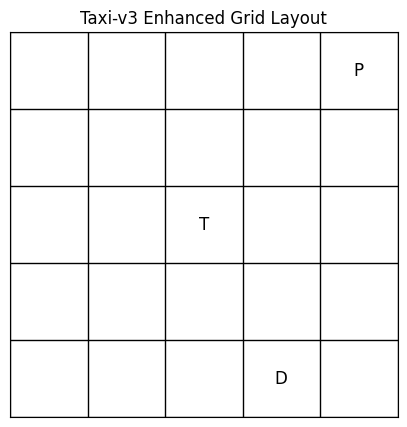

In [13]:
def visualize_grid_enhanced(taxi_position=None, passenger_location=None, destination=None):
    grid_size = 5  # Taxi-v3 uses a 5x5 grid
    grid = np.full((grid_size, grid_size), " ")  # Empty grid

    # Define passenger locations and destinations based on Taxi-v3's default settings
    passenger_locations = {0: (0, 0), 1: (0, 4), 2: (4, 0), 3: (4, 3)}
    destinations = {0: (0, 0), 1: (0, 4), 2: (4, 0), 3: (4, 3)}

    # Mark passenger locations, destinations, and taxi
    if passenger_location:
        grid[passenger_location] = "P"  # Passenger location
    if destination:
        grid[destination] = "D"  # Destination
    if taxi_position:
        grid[taxi_position] = "T"  # Taxi position

    # Plot the grid
    fig, ax = plt.subplots(figsize=(5, 5))
    for (x, y), value in np.ndenumerate(grid):
        ax.text(y, x, value, ha="center", va="center", fontsize=12)

    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.invert_yaxis()
    plt.xticks([])
    plt.yticks([])
    plt.title("Taxi-v3 Enhanced Grid Layout")
    plt.show()

# Example usage with current taxi, passenger, and destination positions
visualize_grid_enhanced(
    taxi_position=(2, 2),  # Example taxi position
    passenger_location=(0, 4),  # Example passenger location
    destination=(4, 3)  # Example destination
)


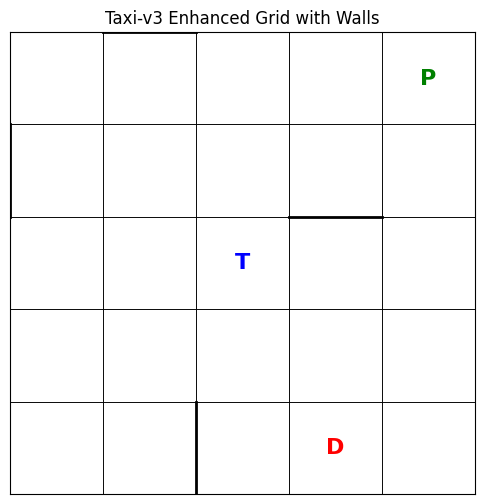

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def visualize_grid_with_walls(taxi_position=None, passenger_location=None, destination=None, walls=None):
    grid_size = 5  # Taxi-v3 uses a 5x5 grid
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(-0.5, grid_size - 0.5)

    # Draw grid
    for x in range(grid_size):
        for y in range(grid_size):
            rect = patches.Rectangle((y - 0.5, x - 0.5), 1, 1, linewidth=0.5, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

    # Add walls (vertical and horizontal)
    if walls:
        for wall in walls:
            x1, y1, x2, y2 = wall
            if x1 == x2:  # Vertical wall
                ax.plot([y1 - 0.5, y1 - 0.5], [x1 - 0.5, x2 + 0.5], color='black', linewidth=2)
            elif y1 == y2:  # Horizontal wall
                ax.plot([y1 - 0.5, y2 + 0.5], [x1 - 0.5, x1 - 0.5], color='black', linewidth=2)

    # Add taxi position
    if taxi_position:
        tx, ty = taxi_position
        ax.text(ty, tx, 'T', color='blue', ha='center', va='center', fontsize=16, fontweight='bold')

    # Add passenger position
    if passenger_location:
        px, py = passenger_location
        ax.text(py, px, 'P', color='green', ha='center', va='center', fontsize=16, fontweight='bold')

    # Add destination position
    if destination:
        dx, dy = destination
        ax.text(dy, dx, 'D', color='red', ha='center', va='center', fontsize=16, fontweight='bold')

    # Final touches
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.5)
    ax.tick_params(which="minor", size=0)
    ax.invert_yaxis()
    plt.xticks([])
    plt.yticks([])
    plt.title("Taxi-v3 Enhanced Grid with Walls")
    plt.show()

# Define example walls, taxi, passenger, and destination positions
example_walls = [
    (0, 1, 1, 1),  # Vertical wall between (0,1) and (1,1)
    (2, 3, 3, 3),  # Vertical wall between (2,3) and (3,3)
    (1, 0, 1, 1),  # Horizontal wall between (1,0) and (1,1)
    (4, 2, 4, 3)   # Horizontal wall between (4,2) and (4,3)
]

# Call the function with dynamic positions
visualize_grid_with_walls(
    taxi_position=(2, 2),  # Example taxi position
    passenger_location=(0, 4),  # Example passenger location
    destination=(4, 3),  # Example destination
    walls=example_walls  # Example walls
)
